In [1]:
import pandas as pd
import numpy as np
import pickle
import nltk
import seaborn as sns
import pymorphy2
import re

from random import randint, random
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nerus import load_nerus
from itertools import chain
from collections import Counter
from tqdm.auto import tqdm

In [2]:
nerus_path = './data/nerus_lenta/nerus_lenta.conllu.gz'

In [3]:
sents_path = './data/nerus_lenta/sents.list'

In [4]:
lemm_sents_path = './data/nerus_lenta/part_lemm_sents.txt'

In [5]:
morph = pymorphy2.MorphAnalyzer()

In [6]:
detokenizer = TreebankWordDetokenizer()

In [7]:
docs = load_nerus(nerus_path)

sents = []

for doc in tqdm(docs, total=800000):
    for sent in doc.sents:
        
        sent_len = len(sent.tokens)
        if sent_len < 3 or sent_len > 40:
            continue
        
        root_id = None
        nsubj = None
        gender = None
        tense = None
        number = None
        
        for token in sent.tokens:

            if token.rel == 'nsubj':
                root_id = token.head_id
                nsubj = token.text
                gender = token.feats.get('Gender')
                number = token.feats.get('Number', 'undefined')
                break
                
        if root_id is None:
            break
        
        root = sent.tokens[int(root_id) - 1]
        if root.rel != 'root':
            break
        
        tense = root.feats.get('Tense')
        if tense is None:
            break
        
        gender = gender if gender is not None else root.feats.get('Gender')
        if gender is None:
            gender = 'undefined'
            
        
        part_lemm_sent = []
        
        n_lemmas = randint(sent_len // 2, sent_len)
        lemma_prob = n_lemmas / sent_len
            
        for token in sent.tokens:
            if lemma_prob >= random():
                parsed_token = morph.parse(token.text)[0]
                # если часть речи == причастие
                if parsed_token.tag.POS == 'PRTF':
                    lemma = parsed_token.inflect({'sing', 'nomn', 'masc'}).word
                else:
                    lemma = parsed_token.normal_form
                part_lemm_sent.append(lemma)
            else:
                part_lemm_sent.append(token.text)
            
        part_lemm_sent = detokenizer.detokenize(part_lemm_sent)
        
        sents.append({'sent': sent.text,
                      'part_lemm_sent': part_lemm_sent,
                      'length': sent_len,
                      'nsubj': nsubj,
                      'gender': gender.lower(),
                      'tense': tense.lower(),
                      'number': number.lower()})

with open(sents_path, 'wb') as f:
    pickle.dump(sents, f)

In [43]:
# pymorphy2.MorphAnalyzer().parse('идти')

[Parse(word='идти', tag=OpencorporaTag('INFN,impf,intr'), normal_form='идти', score=1.0, methods_stack=((DictionaryAnalyzer(), 'идти', 1696, 0),))]

In [6]:
# sent_texts = [sent.get('text') for sent in tqdm(sents)]

  0%|          | 0/1852723 [00:00<?, ?it/s]

In [7]:
# tokenized_sents = [nltk.tokenize.word_tokenize(text, language='russian') for text in tqdm(sent_texts)]

  0%|          | 0/1852723 [00:00<?, ?it/s]

In [8]:
# sents_len = np.array([len(tokenized_sent) for tokenized_sent in tqdm(tokenized_sents)])

  0%|          | 0/1852723 [00:00<?, ?it/s]

In [9]:
# sents_len.mean() + 3 * sents_len.std()

48.223178440745

In [10]:
# sns.set(rc={'figure.figsize':(11.7, 8.27)})

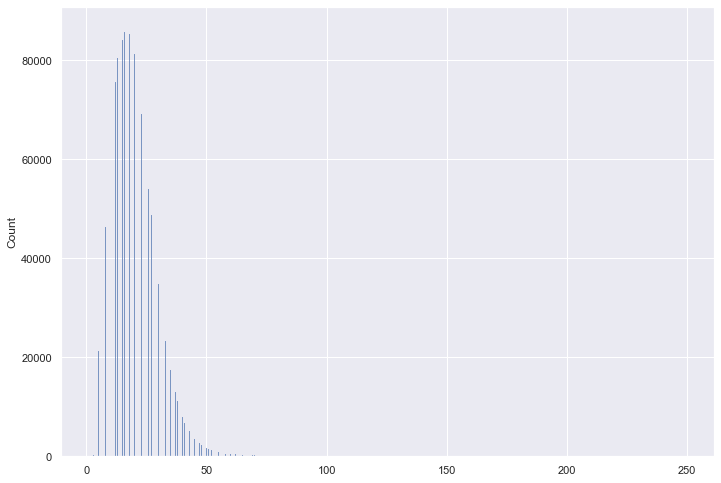

In [11]:
# sns.histplot(data=sents_len);

In [13]:
# tokenized_lemm_sents = []

In [15]:
# for tokenized_sent in tqdm(tokenized_sents):
#     tokenized_lemm_sent = []
#     for token in tokenized_sent:
#         parsed_token = morph.parse(token)[0]
        
#         # если часть речи == причастие
#         if parsed_token.tag.POS == 'PRTF':
#             lemma = parsed_token.inflect({'sing', 'nomn', 'masc'}).word
#         else:
#             lemma = parsed_token.normal_form
            
#         tokenized_lemm_sent.append(lemma)
        
#     tokenized_lemm_sents.append(tokenized_lemm_sent)

  0%|          | 0/1852723 [00:00<?, ?it/s]

In [27]:
# lemm_sents = [detokenizer.detokenize(sent) for sent in tqdm(tokenized_lemm_sents)]

  0%|          | 0/1852723 [00:00<?, ?it/s]

In [29]:
# with open('./data/nerus_lenta/lemm_sents.txt', 'w', encoding='utf-8') as f:
#     for sent in lemm_sents:
#         f.write(sent + '\n')

In [30]:
# tokens = list(chain(*tokenized_sents))

In [31]:
# counted_tokens = Counter(tokens)

In [32]:
# new_tokens = []
# for word, count in tqdm(counted_tokens.items()):
#     if count >= 4:
#         new_tokens.append(word)

  0%|          | 0/688064 [00:00<?, ?it/s]

In [33]:
# len(new_tokens)

215759

In [34]:
# len(counted_tokens)

688064

In [35]:
# lemm_tokens = list(chain(*tokenized_lemm_sents))

In [36]:
# counted_lemm_tokens = Counter(lemm_tokens)

In [37]:
# new_lemm_tokens = []

In [38]:
# for word, count in tqdm(counted_lemm_tokens.items()):
#     if count >= 2:
#         new_lemm_tokens.append(word)

  0%|          | 0/417567 [00:00<?, ?it/s]

In [39]:
# len(new_lemm_tokens)

200568

In [40]:
# len(counted_lemm_tokens)

417567

In [6]:
with open(sents_path, 'rb') as f:
    sents = pickle.load(f)

In [7]:
sents[:3]

[{'text': 'вице-премьер по социальным вопросам татьяна голикова рассказала, в каких регионах россии зафиксирована наиболее высокая смертность от рака, сообщает риа новости.',
  'nsubj': 'вице-премьер',
  'gender': 'masc',
  'tense': 'past'},
 {'text': 'по словам голиковой, чаще всего онкологические заболевания становились причиной смерти в псковской, тверской, тульской и орловской областях, а также в севастополе.',
  'nsubj': 'заболевания',
  'gender': 'neut',
  'tense': 'past'},
 {'text': 'вице-премьер напомнила, что главные факторы смертности в россии — рак и болезни системы кровообращения.',
  'nsubj': 'вице-премьер',
  'gender': 'masc',
  'tense': 'past'}]

In [8]:
data = {'orig_texts': [], 'part_lemm_texts': [], 'length': [], 'nsubj': [], 'gender': [], 'tense': [], 'number': []}

In [9]:
for i in tqdm(range(len(sents))):
    data['orig_texts'].append(sents[i].get('sent'))
    data['part_lemm_texts'].append(sents[i].get('part_lemm_sent'))
    data['length'].append(sents[i].get('length'))
    data['nsubj'].append(sents[i].get('nsubj'))
    data['gender'].append(sents[i].get('gender'))
    data['tense'].append(sents[i].get('tense'))
    data['number'].append(sents[i].get('number'))

In [15]:
df = pd.DataFrame(data)

In [16]:
df.part_lemm_texts = df.part_lemm_texts.map(lambda s: s.replace('``', ' "'))

In [17]:
df.part_lemm_texts = df.part_lemm_texts.map(lambda s: re.sub(r'\w"\w', lambda m: f'{m.group()[:2]} {m.group()[-1]}', s))

In [18]:
df

,orig_texts,part_lemm_texts,length,nsubj,gender,tense,number
0,Вице-премьер по социальным вопросам Татьяна Го...,вице-премьер по социальный вопросам татьяна го...,23,Вице-премьер,masc,past,sing
1,"По словам Голиковой, чаще всего онкологические...","по слово голиков, частый весь онкологический з...",26,заболевания,neut,past,plur
2,"Вице-премьер напомнила, что главные факторы см...","вице-премьер напомнить, что главный факторы см...",16,Вице-премьер,masc,past,sing
3,Австрийские правоохранительные органы не предс...,австрийский правоохранительный орган не предст...,12,органы,masc,past,plur
4,Об этом сообщил посол России в Вене Дмитрий Лю...,Об этом сообщить посол россия в Вене дмитрий Л...,23,посол,masc,past,sing
...,...,...,...,...,...,...,...
1835687,"Как сообщили ""Интерфаксу"" во временном пресс-ц...","как сообщить "" Интерфаксу "" в временной пресс-...",24,они,undefined,pres,plur
1835688,"Всего, по имеющимся в пресс-центре сведениям, ...","весь, по имеющийся в пресс-центр сведение, гру...",18,группировка,fem,pres,sing
1835689,Намеченная на сегодняшний день церемония вступ...,намеченный на сегодняшний день церемония вступ...,17,церемония,fem,fut,sing
1835690,"Владимир Семенов находится в Москве, где вмест...","владимир семён находиться в москва, где вместе...",39,Владимир,masc,pres,sing


In [19]:
df.to_csv('./data/nerus_lenta/dataset.csv', index=False)

In [2]:
df = pd.read_csv('./data/nerus_lenta/dataset.csv')

In [3]:
df

,orig_texts,part_lemm_texts,length,nsubj,gender,tense,number
0,Вице-премьер по социальным вопросам Татьяна Го...,вице-премьер по социальный вопросам татьяна го...,23,Вице-премьер,masc,past,sing
1,"По словам Голиковой, чаще всего онкологические...","по слово голиков, частый весь онкологический з...",26,заболевания,neut,past,plur
2,"Вице-премьер напомнила, что главные факторы см...","вице-премьер напомнить, что главный факторы см...",16,Вице-премьер,masc,past,sing
3,Австрийские правоохранительные органы не предс...,австрийский правоохранительный орган не предст...,12,органы,masc,past,plur
4,Об этом сообщил посол России в Вене Дмитрий Лю...,Об этом сообщить посол россия в Вене дмитрий Л...,23,посол,masc,past,sing
...,...,...,...,...,...,...,...
1835687,"Как сообщили ""Интерфаксу"" во временном пресс-ц...","как сообщить "" Интерфаксу "" в временной пресс-...",24,они,undefined,pres,plur
1835688,"Всего, по имеющимся в пресс-центре сведениям, ...","весь, по имеющийся в пресс-центр сведение, гру...",18,группировка,fem,pres,sing
1835689,Намеченная на сегодняшний день церемония вступ...,намеченный на сегодняшний день церемония вступ...,17,церемония,fem,fut,sing
1835690,"Владимир Семенов находится в Москве, где вмест...","владимир семён находиться в москва, где вместе...",39,Владимир,masc,pres,sing
